In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [86]:
#Observation
# -> There is one null value in question1 field
# -> There are two null value in question2 field

## Distribution of data among output classes

<AxesSubplot:xlabel='is_duplicate'>

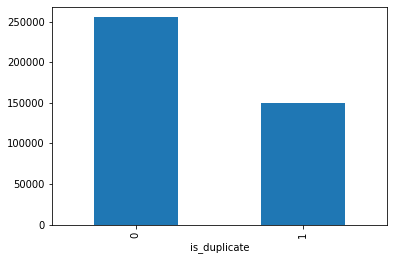

In [8]:
data.groupby('is_duplicate')['id'].count().plot.bar() 

In [15]:
print("Percentage of Questions that are duplicate {}% ".format(round(data['is_duplicate'].mean()*100,2)))

Percentage of Questions that are duplicate 36.92% 


In [12]:
print("Percentage of Questions that are not duplicate {}% ".format(100 - round(data['is_duplicate'].mean()*100,2)))

Percentage of Questions that are not duplicate 63.08% 


In [16]:
print("Total number of questions {}".format(len(data)))

Total number of questions 404290


## Unique Questions

In [37]:
qids = pd.Series(data['qid1'] + data['qid2']) #concatenating two lists together
unique_qids = len(np.unique(qids))  # finding number of unique question from total questions
repeated = np.sum((qids.value_counts()>1)) # finding number of questions that are repeated 
print("Total number of unique questions that appear  more than one time {} ".format(unique_qids))
print("{}% of unique questions  are repeated".format((repeated/unique_qids)*100))
print("maximum number of times a unique question is repeated {}".format(max(qids.value_counts())))

Total number of unique questions that appear  more than one time 347345 
14.453929090673537% of unique questions  are repeated
maximum number of times a unique question is repeated 6


In [39]:
qid_value_counts = qids.value_counts() 
qid_values = qids.values

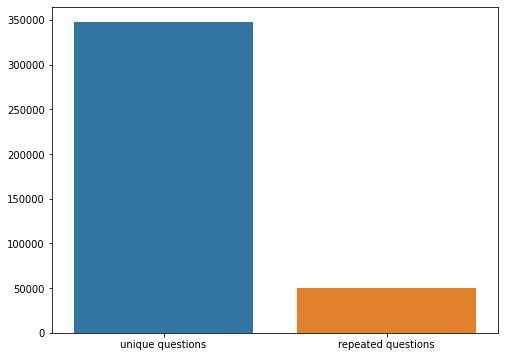

In [44]:
x = ["unique questions", "repeated questions"]
y = [ unique_qids, repeated]
plt.figure(figsize=(8,6))
sns.barplot(x=x,y=y)
plt.show()

## Checking duplicate pairs

In [59]:
len(data.groupby(['qid1','qid2']).count()) - len(data) #to find the number of unique pair and then subtracting from original number of data

0

## Number of occurences of each questions

Text(0.5, 1.0, 'Log histogram of question appearance counts')

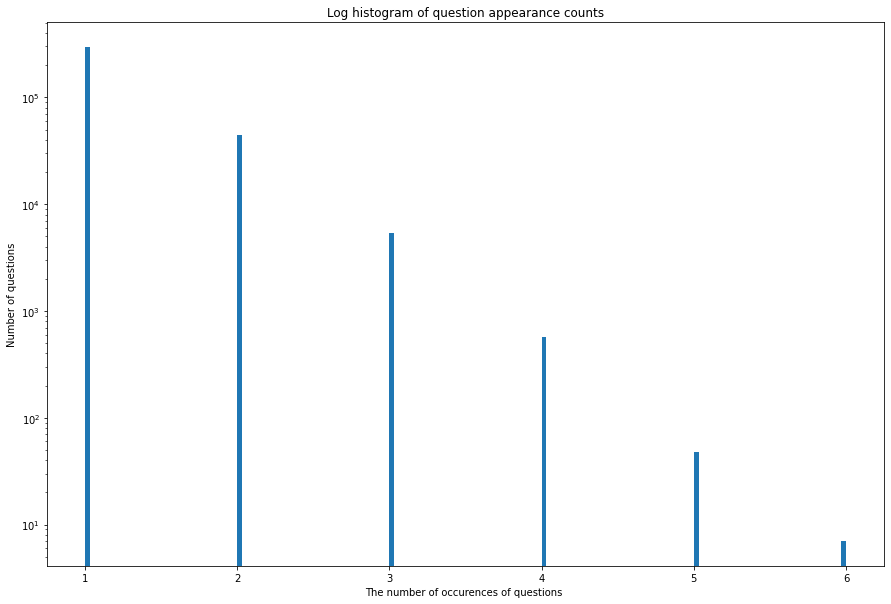

In [87]:
plt.figure(figsize=(15, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log')

plt.xlabel("The number of occurences of questions ")

plt.ylabel("Number of questions")

plt.title("Log histogram of question appearance counts")

## Checking for null - values

In [77]:
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [84]:
data = data.fillna("") #removing NAN fields by space

In [85]:
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate


## Basic Feature Extraction

In [114]:
data['freq_q1'] = data.groupby('qid1')['qid1'].transform('count')#attribute to find the number of q1 ids of each type
data['freq_q2'] = data.groupby('qid2')['qid2'].transform('count')#attribut to find out the nuber of q2 ids of each type
data['q1len'] = data['question1'].str.len() #the number of letters in each question 1 
data['q2len'] = data['question2'].str.len() #the number of letters in question 2
data['q1_n_words'] = data['question1'].apply(lambda row : len(row.split(" "))) #the number of words in each question 1
data['q2_n_words'] = data['question2'].apply(lambda row : len(row.split(" "))) #the number of words in each question 2

In [115]:
data

,id,qid1,qid2,question1,question2,is_duplicate,freq_q1,freq_q2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,2,2,85,79,14,13
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,12,1,41,42,8,9
404287,404287,537928,537929,What is one coin?,What's this coin?,0,1,1,17,17,4,3
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,1,1,94,127,17,25


In [142]:
## common word length


# data['question1'].apply( lambda row : set(row.lower().strip().split(" "))) this is the skeleton code, to implement for each row one by one we will write a helping function

def common_words_length(row):
    w1 = set(map(lambda r1 : r1.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda r1: r1.lower().strip(), row['question2'].split(" ")))
    return 1.0* len(w1 & w2)



In [141]:
data["common_word_length"] = data.apply(common_words_length,axis =1)

In [145]:
## Total number of words

def total_words(row):
    w1 = set(map(lambda r1 : r1.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda r1: r1.lower().strip(), row['question2'].split(" ")))
    return 1.0*(len(w1)+len(w2))

In [146]:
data["total words in q1 and q2"] = data.apply(total_words,axis =1)

In [179]:
## Word share

##common word length / total words
def word_share(row):
    w1 = set(map(lambda r1 : r1.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda r1: r1.lower().strip(), row['question2'].split(" ")))
    return 100* (len(w1 & w2)/(len(w1)+len(w2)))


In [180]:
data["word_share"] = data.apply(word_share,axis =1)

In [150]:
data['freq_q1+q2'] = data['freq_q1']+data['freq_q2'] #total frequency
data['freq_q1-q2'] = abs(data['freq_q1']-data['freq_q2']) #the absolute difference between the frequency 

## Analysis of data using new features

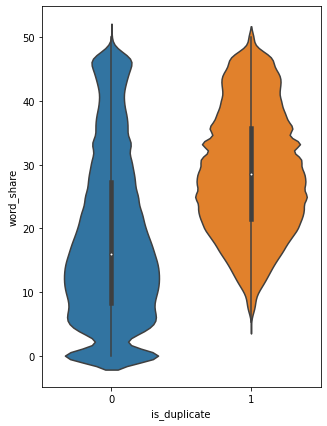

In [181]:
plt.figure(figsize=(5,7))
sns.violinplot(x= data['is_duplicate'], y= data['word_share'])
plt.show()

In [182]:
#OBSERVATION - 
#1) if the number of words share is more than 30% then there is high chance of the questions being similar
# 2) if the words shared are less than 10% the chances are that the questions are dissimilar

C:\Users\Ammu\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ammu\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_share', ylabel='Density'>

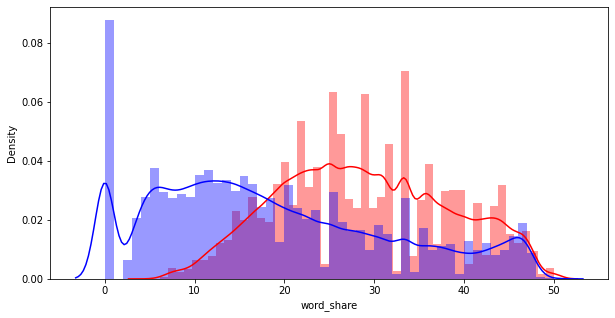

In [183]:
plt.figure(figsize=(10,5))
sns.distplot(data[data['is_duplicate']==1]['word_share'], label='1', color='red')
sns.distplot(data[data['is_duplicate']==0]['word_share'], label = '0', color = 'blue')

In [ ]:
#The distance plots do not completely overlap and shows that the feature word share contributes to identifying the problem statement

<AxesSubplot:xlabel='is_duplicate', ylabel='common_word_length'>

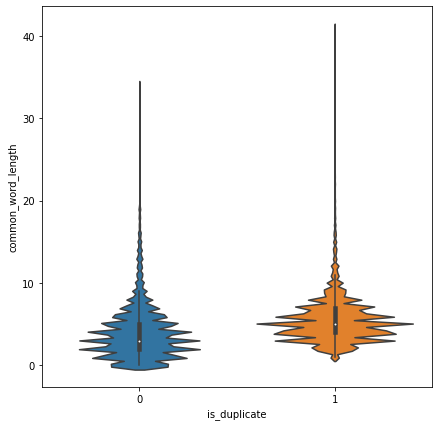

In [174]:
plt.figure(figsize=(7,7))
sns.violinplot(x=data['is_duplicate'], y=data['common_word_length'])

C:\Users\Ammu\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ammu\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='common_word_length', ylabel='Density'>

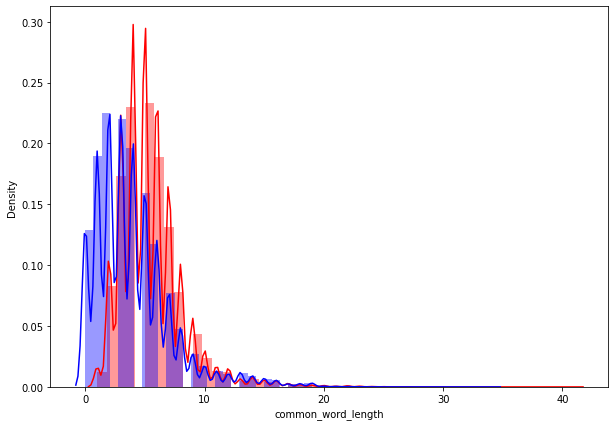

In [178]:
plt.figure(figsize=(10,7))
sns.distplot(data[data['is_duplicate']==1]['common_word_length'], label='1', color='red')
sns.distplot(data[data['is_duplicate']==0]['common_word_length'], label = '0', color = 'blue')

In [ ]:
#Observation
#Using common word length alone it seems to be pretty difficult to seperate the two typesof data